# Load annotations of AFW dataset from matlab file


## Import matlab utils from scipy

In [23]:
import numpy as np
from scipy.io.matlab import loadmat
import matplotlib.pyplot as plt
from PIL import Image

## The matlab file
The file is found on `annotations` folder of `Accuracy tool` for Face Detection  developed by M. Mathias, R. Benenson, M. Pedersoli, L. Van Gool, ECCV 2014 at [bitbutket](http://markusmathias.bitbucket.org/2014_eccv_face_detection/).

In [24]:
file_path = "Annotations_Face_PASCALLayout_large_fixed.mat"
# Load the file
ann_data = loadmat(file_path)['Annotations']
len(ann_data)

851

## Information about file

* `ann_data` contains `imgname`, `objects` which is a set of bounding boxes. 
* It contains the information of 205 images inside.


In [25]:
print(len(ann_data))
ann_data[:1]

851


array([[(array(['2008_003880.jpg'], dtype='<U15'), array([[360],
       [480],
       [  3]]), array([[135, 130, 179, 182,   0,   0]]), array([[0]]))]],
      dtype=[('imgname', 'O'), ('imgsize', 'O'), ('objects', 'O'), ('flags', 'O')])

## Loops to get image paths and bounding boxes

In [16]:
all_img_names = []
all_img_boxes = []

for i in range(len(ann_data)):
    img_name = ann_data[i]['imgname'][0][0]
    all_img_names.append(img_name)
    
    # a set of bounding boxes for this image
    img_bboxes = []
    items = ann_data[i]['objects'][0]
    for item in items:
        xmin = item[0]
        ymin = item[1]
        xmax = item[2]
        ymax = item[3]
        img_bboxes.append([xmin, ymin, xmax, ymax])
    
    all_img_boxes.append(img_bboxes)

all_img_boxes = np.array(all_img_boxes)
    

In [17]:
all_img_names[0]

'2007_000272.jpg'

In [18]:
all_img_boxes[0]

[[166, 118, 246, 235]]

## Check the result by visualization

In [19]:
def draw_bboxes(img, img_bboxes):
    plt.imshow(img)
    current_axis = plt.gca()
    
    # Draw the ground truth boxes in green
    for box in img_bboxes:
        xmin = box[0]
        ymin = box[1]
        xmax = box[2]
        ymax = box[3]
        current_axis.add_patch(plt.Rectangle((xmin, ymin), 
                                         xmax - xmin, ymax - ymin, 
                                         color='green', fill=False, linewidth=2))
                          
    plt.show()

In [46]:
# Read the image
img_path = '/Users/quanguet/Datasets/PascalFace/' + all_img_names[100]
img = Image.open(img_path)

# Get the bounding boxes
img_bboxes = all_img_boxes[100]

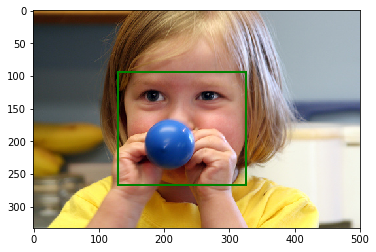

In [47]:
draw_bboxes(img, img_bboxes)

## Build the dataset file for Pytorch Model

* The file contains 205 lines in which each line represents for 1 image.

* Each line has the format:

```
img_name.jpg box1 box2 ... boxk
```
* Each box has the format:

```
xmin ymin xmax ymax label
```
For face detection, the `label` = `0` because we have only one label. 

In [54]:
afw_file = open('pascal_file.txt', 'w')

In [55]:
for img_name, img_bboxes in zip(all_img_names, all_img_boxes):
    afw_file.write(img_name + ' ')
    
    for box in img_bboxes:
        # The bbox
        for val in box:
            afw_file.write(val.astype(str))
            afw_file.write(' ')
        # The label
        afw_file.write('0 ')
        
    afw_file.write('\n')

afw_file.close()

In [56]:
!head -2 new_afw_file.txt

2007_000272.jpg 166 118 246 235 0 
2007_000664.jpg 94 91 274 252 0 


# Check whether Pascal Face Image exists or not

In [10]:
with open('pascal_file.txt', 'r') as f:
    data = f.readlines()

In [13]:
img_names = [line.split(' ')[0] for line in data]
img_names[:2]

['2007_000272.jpg', '2007_000664.jpg']

In [15]:
import os
img_paths = [os.path.join('/Users/quanguet/Datasets/PascalFace/', img_name) 
             for img_name in img_names]
img_paths[0]

'/Users/quanguet/Datasets/PascalFace/2007_000272.jpg'

In [21]:
for img_path in img_paths:
    if os.path.exists(img_path) == False:
        print('No', img_path)

No /Users/quanguet/Datasets/PascalFace/2008_000210.jpg


In [22]:
os.path.exists('/Users/quanguet/Datasets/PascalFace/2011_000360.jpg')

True